read embedding data

In [ ]:
import pandas as pd
import numpy as np
import gc


data = pd.read_parquet('/content/drive/MyDrive/Doukt/Goftino/NLP/colab/data/embeddings.parquet')
data = data.drop('original_index', axis=1)
data.head(4)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Doukt/Goftino/NLP/colab/data/embeddings.parquet'

In [ ]:
import pandas as pd

data_reduced = pd.read_csv('/content/drive/MyDrive/Doukt/Goftino/NLP/colab/data/reduceEmbedd.csv')
data_reduced.head(3)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2.098980,7.627120,2.577093,9.333970,6.319879,9.905897,6.753044,4.983684,4.255933,6.002865,...,4.929072,6.217041,3.509461,5.252534,4.395399,3.627794,5.885494,4.441439,4.123920,5.395330
1,3.467958,8.218585,1.098524,8.910731,5.476128,9.927983,5.721880,5.420950,3.990563,5.729942,...,4.978472,6.213044,3.491864,5.275298,4.417575,3.609242,5.860097,4.404436,4.050121,5.368636
2,8.547177,7.131636,1.032969,8.967647,4.963443,9.924237,4.943444,5.754600,4.197826,5.766913,...,4.932621,6.183344,3.487303,5.256352,4.594871,3.746347,5.931955,4.395389,3.945309,5.410691


find best cluster

inertai evaluate

For n_clusters = 40, the inertia is 36891.38145291155
For n_clusters = 41, the inertia is 36523.802651004145
For n_clusters = 42, the inertia is 35699.21283564338
For n_clusters = 43, the inertia is 35106.745489124085
For n_clusters = 44, the inertia is 34756.42375520827
For n_clusters = 45, the inertia is 33781.4234074757
For n_clusters = 46, the inertia is 32928.1502346172
For n_clusters = 47, the inertia is 32262.67028061766
For n_clusters = 48, the inertia is 31928.624239902114
For n_clusters = 49, the inertia is 31843.884815070356
For n_clusters = 50, the inertia is 31149.340890081414
For n_clusters = 51, the inertia is 30000.336905352902
For n_clusters = 52, the inertia is 29630.33148557295
For n_clusters = 53, the inertia is 29152.86710351969
For n_clusters = 54, the inertia is 28096.545607201795
For n_clusters = 55, the inertia is 27303.907030761788
For n_clusters = 56, the inertia is 27116.40098913106
For n_clusters = 57, the inertia is 26604.402565285985
For n_clusters = 58, 

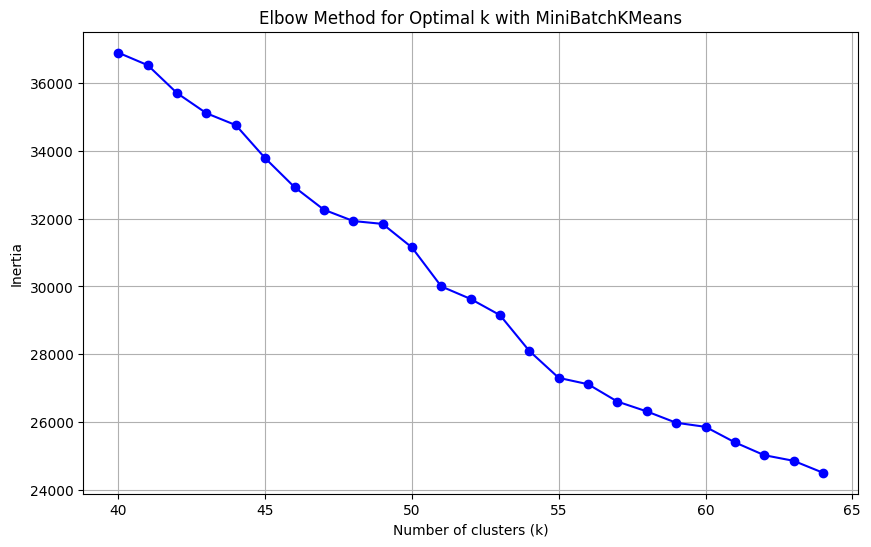

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans

# Range of k values to test
k_range = range(40, 65)
inertia_values = []

# Calculate inertia for each k
for k in k_range:
    model = MiniBatchKMeans(
        n_clusters=k,
        batch_size=1000,
        init='k-means++',
        random_state=42
    )
    model.fit(data_reduced)
    inertia_values.append(model.inertia_)
    print(f"For n_clusters = {k}, the inertia is {model.inertia_}")

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k with MiniBatchKMeans')
plt.grid(True)
plt.show()

davies_bouldin evaluate

Computing Davies-Bouldin score for k=40...
k=40, Davies-Bouldin score: 0.9388
Computing Davies-Bouldin score for k=41...
k=41, Davies-Bouldin score: 0.9339
Computing Davies-Bouldin score for k=42...
k=42, Davies-Bouldin score: 0.9356
Computing Davies-Bouldin score for k=43...
k=43, Davies-Bouldin score: 0.9695
Computing Davies-Bouldin score for k=44...
k=44, Davies-Bouldin score: 0.9486
Computing Davies-Bouldin score for k=45...
k=45, Davies-Bouldin score: 0.9897
Computing Davies-Bouldin score for k=46...
k=46, Davies-Bouldin score: 0.9983
Computing Davies-Bouldin score for k=47...
k=47, Davies-Bouldin score: 0.9815
Computing Davies-Bouldin score for k=48...
k=48, Davies-Bouldin score: 0.9949
Computing Davies-Bouldin score for k=49...
k=49, Davies-Bouldin score: 0.9590
Computing Davies-Bouldin score for k=50...
k=50, Davies-Bouldin score: 1.0299
Computing Davies-Bouldin score for k=51...
k=51, Davies-Bouldin score: 1.0612
Computing Davies-Bouldin score for k=52...
k=52, Davies-Bouldin 

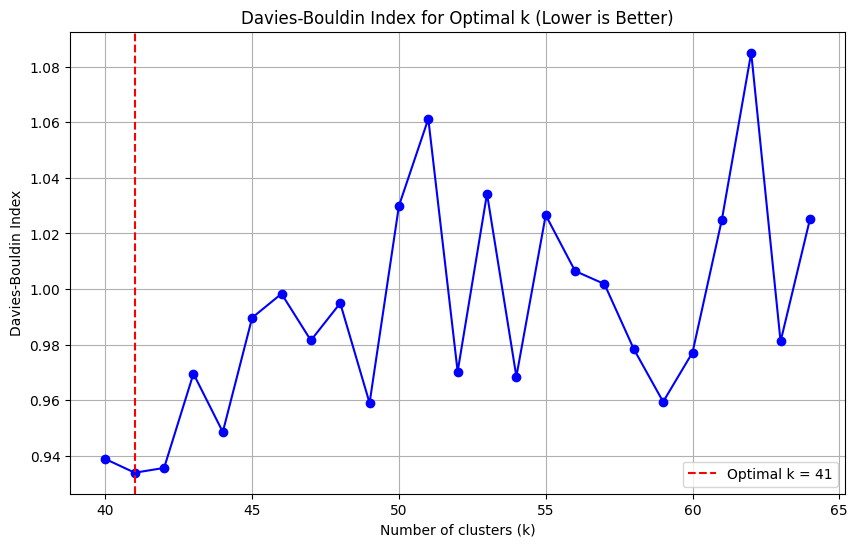

In [ ]:
from sklearn.metrics import davies_bouldin_score
import numpy as np

# Range of k values to test
k_range = range(40, 65)
db_scores = []

for k in k_range:
    print(f"Computing Davies-Bouldin score for k={k}...")
    model = MiniBatchKMeans(
        n_clusters=k,
        batch_size=2000,
        init='k-means++',
        random_state=42,
        n_init=3,
        max_iter=100
    )
    labels = model.fit_predict(data_reduced)
    db = davies_bouldin_score(data_reduced, labels)
    db_scores.append(db)
    print(f"k={k}, Davies-Bouldin score: {db:.4f}")

# Find the optimal k (minimum Davies-Bouldin score)
optimal_k = k_range[np.argmin(db_scores)]
print(f"Optimal number of clusters (k): {optimal_k}")
print(f"Optimal Davies-Bouldin score: {min(db_scores):.4f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, db_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Optimal k (Lower is Better)')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.grid(True)
plt.legend()
plt.show()

silhouette **evaluate**


Starting parallel computation of silhouette scores...
Total computation time: 50.82 seconds


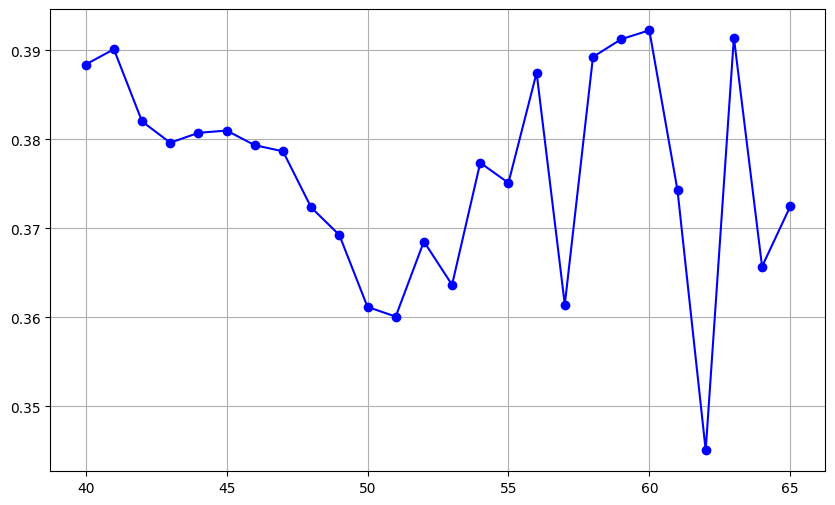

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import numpy as np
from joblib import Parallel, delayed
import time

# Function to compute silhouette score for a specific k
def compute_silhouette_for_k(k, data):
    start_time = time.time()
    minibatch_kmeans = MiniBatchKMeans(
        n_clusters=k,
        batch_size=2000,  # Increased batch size for faster processing
        init='k-means++',
        random_state=42,
        n_init=3,         # Reduced number of initializations
        max_iter=100,     # Limit maximum iterations
        tol=0.01          # Increased tolerance for faster convergence
    )

    cluster_labels = minibatch_kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(
        data,
        cluster_labels,
        sample_size=min(10000, len(data)),  # Use sampling for large datasets
        random_state=42
    )
    elapsed_time = time.time() - start_time
    print(f"For n_clusters = {k}, silhouette = {silhouette_avg:.4f} (computed in {elapsed_time:.2f} seconds)")
    return silhouette_avg

k_range = range(40, 66)

print("Starting parallel computation of silhouette scores...")
start_total = time.time()

# Parallel processing for multiple k values
silhouette_scores = Parallel(n_jobs=-1)(
    delayed(compute_silhouette_for_k)(k, data_reduced) for k in k_range
)

print(f"Total computation time: {time.time() - start_total:.2f} seconds")

# show Silhouette Score plot
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'bo-')

plt.grid(True)
plt.show()